In [17]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [18]:
twitted_data = pd.read_csv('twitter_training.csv')
twitted_data.head(10)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...


In [19]:
# We rename the columns name
twitted_data.rename(columns={
    '2401':'Tweet_ID',
        'Borderlands':'Topic',
        'Positive':'Sentiment',
        'im getting on borderlands and i will murder you all ,':'Tweet'
},inplace=True )
twitted_data.head()

,Tweet_ID,Topic,Sentiment,Tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [20]:
# Shape of the data
twitted_data.shape

(74681, 4)

In [21]:
# Percentage of missing data
(twitted_data.isnull().sum()/74681)*100

Tweet_ID     0.000000
Topic        0.000000
Sentiment    0.000000
Tweet        0.918574
dtype: float64

In [22]:
# only 0.91%  of missing data in tweet feature are null we will drop them
twitted_data.dropna(axis=0, inplace=True)

In [23]:
twitted_data.shape

(73995, 4)

In [24]:
# mchecking duplicate values
twitted_data.duplicated().sum()

2340

In [25]:
twitted_data.drop_duplicates(keep='first')

,Tweet_ID,Topic,Sentiment,Tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [26]:
twitted_data['Topic'].value_counts()

MaddenNFL                            2377
LeagueOfLegends                      2377
CallOfDuty                           2376
Verizon                              2365
TomClancysRainbowSix                 2364
Facebook                             2362
Microsoft                            2361
Dota2                                2359
WorldOfCraft                         2357
ApexLegends                          2353
CallOfDutyBlackopsColdWar            2343
NBA2K                                2343
johnson&johnson                      2324
FIFA                                 2324
TomClancysGhostRecon                 2321
Battlefield                          2316
Overwatch                            2316
GrandTheftAuto(GTA)                  2293
HomeDepot                            2292
PlayStation5(PS5)                    2291
Hearthstone                          2286
CS-GO                                2284
Xbox(Xseries)                        2283
Borderlands                       

In [27]:
pd.crosstab(index=twitted_data['Sentiment'], columns=twitted_data['Topic'])

Topic,Amazon,ApexLegends,AssassinsCreed,Battlefield,Borderlands,CS-GO,CallOfDuty,CallOfDutyBlackopsColdWar,Cyberpunk2077,Dota2,...,Overwatch,PlayStation5(PS5),PlayerUnknownsBattlegrounds(PUBG),RedDeadRedemption(RDR),TomClancysGhostRecon,TomClancysRainbowSix,Verizon,WorldOfCraft,Xbox(Xseries),johnson&johnson
Sentiment,,,,,,,,,,,,,,,,,,,,,
Irrelevant,186,192,264,915,240,632,672,569,465,425,...,667,395,895,210,24,96,180,216,714,197
Negative,575,591,375,464,426,344,883,566,385,767,...,627,453,678,305,894,1115,1092,340,373,845
Neutral,1207,936,156,351,597,548,375,352,462,588,...,296,507,263,807,789,640,565,1064,411,1013
Positive,308,634,1439,586,1016,760,446,856,950,579,...,726,936,398,927,614,513,528,737,785,269


In [28]:
twitted_data['Sentiment'].value_counts()

Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: Sentiment, dtype: int64

([<matplotlib.patches.Wedge at 0x2c140c40910>,
 [Text(0.9607838724567679, 1.3414150552409116, 'Negative'),
  Text(-1.5406022035686802, 0.5908001780291939, 'Positive'),
  Text(-0.473836684503466, -1.5804995401513926, 'Neutral'),
  Text(1.4095625136820573, -0.8576908067726505, 'Irrelevant')],
 [Text(0.5240639304309642, 0.7316809392223153, '30.2%'),
  Text(-0.8403284746738254, 0.3222546425613785, '27.9%'),
  Text(-0.25845637336552685, -0.8620906582643958, '24.5%'),
  Text(0.768852280190213, -0.4678313491487184, '17.4%')])

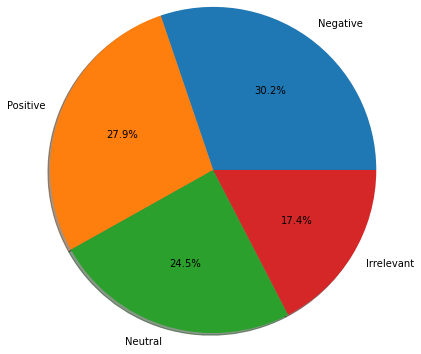

In [29]:
import matplotlib.pyplot as plt

#Visualizing Sentiment feature - Target feature
plt.figure(figsize=(15,5))

#plot pie chart
plt.subplot(1,2,1)
label = twitted_data['Sentiment'].value_counts().index
label_count = twitted_data['Sentiment'].value_counts().values
plt.pie(data=twitted_data, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1.5)


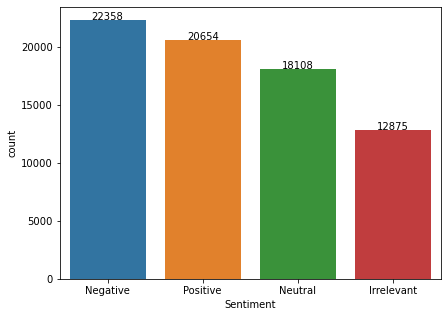

In [30]:
import seaborn as sns
#plot countplot chart
plt.figure(figsize=(15,5))

plt.subplot(1,2,2)
ax = sns.countplot(x='Sentiment', data=twitted_data, order=label)
for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x()+(p.get_width()/2),
    y=height+0.2,ha='center',s='{:.0f}'.format(height))
plt.show()

In [31]:
# word count per tweet
twitted_data['word_count'] = twitted_data['Tweet'].apply(lambda x : len(x.split()))
twitted_data.head()

,Tweet_ID,Topic,Sentiment,Tweet,word_count
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,12
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,10
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,10
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,12
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,10


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

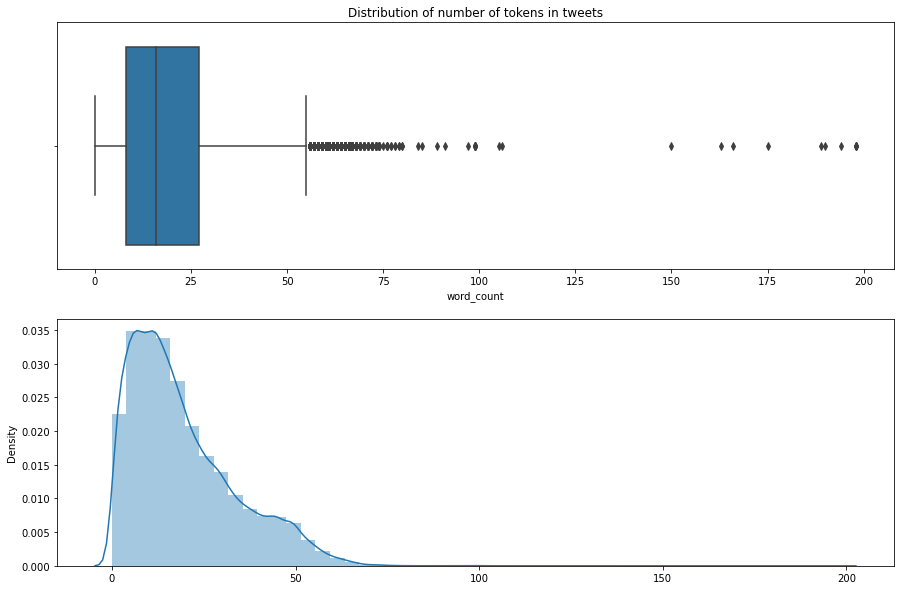

In [32]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.boxplot(x=twitted_data['word_count'])
plt.title(('Distribution of number of tokens in tweets'))

plt.subplot(2,1,2)
sns.distplot(x=twitted_data['word_count'])